In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from games.modules.experimental_statistical_testing.experimental_statistical_tests import (anova,
                                                  tukeys_hsd,
                                                  t_tests,
                                                  BH_correction,
                                                  run_corrected_t_tests,
                                                  repeated_measures_anova)
plt.style.use("/Users/kdreyer/Documents/Github/HBS_GAMES2/src/games/paper.mplstyle.py")
path = "/Users/kdreyer/Documents/Github/HBS_GAMES2/src/games/modules/experimental_statistical_testing/"
path_exp_data = path + "experimental_data/"
path_stats = path + "results/"
path_plots = path + "experimental_data_plots/"

/Users/kdreyer/Documents/Github/HBS_GAMES2/.venv/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Figure 1

### Figure 1A plot

In [2]:
df_plot_pO2 = pd.read_csv(path_exp_data+"plot_figure1A_pO2.csv")
# print(df_plot_pO2)
df_plot_pctO2 = pd.read_csv(path_exp_data+"plot_figure1A_pctO2.csv")
# print(df_plot_pctO2)

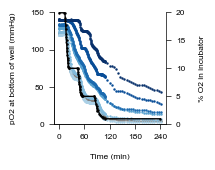

In [9]:
# create figure 2D plot
blues = plt.cm.get_cmap("Blues", 10)
fig, ax = plt.subplots(1, 1, figsize=(2.25, 2), sharey=True)
ax2 = ax.twinx()
ax.plot(df_plot_pO2["time_min"], df_plot_pO2["media_0_pO2"], color="gray", linestyle="none", marker="o", markersize="1", label="0 uL")
ax.plot(df_plot_pO2["time_min"], df_plot_pO2["media_125_pO2"], color=blues(3), linestyle="none", marker="o", markersize="0.75", label="125 uL")
ax.plot(df_plot_pO2["time_min"], df_plot_pO2["media_250_pO2"], color=blues(4), linestyle="none", marker="o", markersize="0.75", label="250 uL")
ax.plot(df_plot_pO2["time_min"], df_plot_pO2["media_500_pO2"], color=blues(5), linestyle="none", marker="o", markersize="0.75", label="500 uL")
ax.plot(df_plot_pO2["time_min"], df_plot_pO2["media_750_pO2"], color=blues(7), linestyle="none", marker="o", markersize="0.75", label="750 uL")
ax.plot(df_plot_pO2["time_min"], df_plot_pO2["media_1000_pO2"], color=blues(8), linestyle="none", marker="o", markersize="0.75", label="1000 uL")
ax.plot(df_plot_pO2["time_min"], df_plot_pO2["media_1500_pO2"], color=blues(9), linestyle="none", marker="o", markersize="0.75", label="1500 uL")
ax2.plot(df_plot_pctO2["time_min"], df_plot_pctO2["pct_O2"], color="k", linestyle="-", marker="o", markersize="0.75", label="Air")
ax.set_xlabel("Time (min)")
ax.set_xticks([0, 60, 120, 180, 240])
ax.set_ylim([0, 150])
ax.set_ylabel("pO2 at bottom of well (mmHg)")
ax.set_yticks([0, 50, 100, 150])
ax.spines[['right']].set_visible(True)
ax.set_box_aspect(1)
ax2.set_ylabel("% O2 in incubator")
ax2.set_yticks([0, 5, 10, 15, 20])
ax2.set_ylim([0, 20])
# plt.show()
plt.savefig(path_plots+"figure_1a.svg")

### Figure 1C statistical tests

In [ ]:
df_all = pd.read_csv(path_exp_data+"Exp03_main.csv")
# print(df_all)

In [ ]:
### red fluorescent protein ###
# select data for red only
df_red = df_all[df_all["condition"].str.contains("red")]
# print(df_red)
# run t-tests
red_comparisons = [
    ["red_normoxic", "red_hypoxic_ice"], 
    ["red_normoxic", "red_hypoxic_rt"], 
    ["red_normoxic", "red_hypoxic_ox_ice"]
]
# t_test_df = run_corrected_t_tests(path_stats, "figure1c_red", "rfu", df_all, red_comparisons)
# print(t_test_df)

# run 1 way anova
# anova_table = anova(path_stats, "figure1c_red", df_red, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
# tukeys_tables = tukeys_hsd(path_stats, "figure1c_red", "rfu", df_red, ["condition"])
# for table in tukeys_tables:
#     print(table)

In [ ]:
### green fluorescent protein ###
# select data for green only
df_green = df_all[df_all["condition"].str.contains("green")]
# run t-tests
green_comparisons = [
    ["green_normoxic", "green_hypoxic_ice"], 
    ["green_normoxic", "green_hypoxic_rt"], 
    ["green_normoxic", "green_hypoxic_ox_ice"]
]
# t_test_df = run_corrected_t_tests(path_stats, "figure1c_green", "rfu", df_all, green_comparisons)
# print(t_test_df)

# run 1 way anova
# anova_table = anova(path_stats, "figure1c_green", df_green, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
tukeys_tables = tukeys_hsd(path_stats, "figure1c_green", "rfu", df_green, ["condition"])
for table in tukeys_tables:
    print(table)

In [ ]:
### blue fluorescent protein ###
# select data for green only
df_blue = df_all[df_all["condition"].str.contains("blue")]
# run t-tests
blue_comparisons = [
    ["blue_normoxic", "blue_hypoxic_ice"], 
    ["blue_normoxic", "blue_hypoxic_rt"], 
    ["blue_normoxic", "blue_hypoxic_ox_ice"]
]
# t_test_df = run_corrected_t_tests(path_stats, "figure1c_blue", "rfu", df_all, blue_comparisons)
# print(t_test_df)

# run 1 way anova
# anova_table = anova(path_stats, "figure1c_blue", df_blue, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
tukeys_tables = tukeys_hsd(path_stats, "figure1c_blue", "rfu", df_blue, ["condition"])
for table in tukeys_tables:
    print(table)

### Figure 1C plot

In [9]:
df_data_plot = pd.read_csv(path_exp_data+"plot_figure1C_supp_figure3.csv")
df_data_main = df_data_plot[~df_data_plot["condition"].str.contains("f")]
# print(df_data_main)

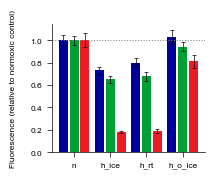

In [10]:
# format data and labels for plotting
conditions = df_data_main["condition"].to_list()
plot_xlabels = [conditions[i] for i in range(0, len(conditions), 3)]
rfu = df_data_main["rfu"].to_list()
plot_rfu = [rfu[i:i + 3] for i in range(0, len(rfu), 3)]
std_err = df_data_main["std_err"].to_list()
plot_std_err = [std_err[i:i + 3] for i in range(0, len(std_err), 3)]

# create plot
blue_ = [(i/255) for i in [0, 0, 154]]
red_ = [(i/255) for i in [237, 28, 36]]
green_ = [(i/255) for i in [0, 159, 53]]
fig, ax = plt.subplots(1, 1, figsize=(2.25, 1.75))
x_ticks = []
for index, rfu_list in enumerate(plot_rfu[:4]):
    ax.bar(index-0.3, rfu_list[2], width=0.25, color=blue_, align="center", label="blue")
    (_, caps1, _) = ax.errorbar(index-0.3, rfu_list[2], plot_std_err[index][2], color="k", capsize=1.5, elinewidth=0.5)
    ax.bar(index, rfu_list[1], width=0.25, color=green_, align="center", label="green")
    (_, caps2, _) = ax.errorbar(index, rfu_list[1], plot_std_err[index][1], color="k", capsize=1.5, elinewidth=0.5)
    ax.bar(index+0.3, rfu_list[0], width=0.25, color=red_, align="center", label="red")
    (_, caps3, _) = ax.errorbar(index+0.3, rfu_list[0], plot_std_err[index][0], color="k", capsize=1.5, elinewidth=0.5)
    x_ticks.append(index)

    for cap in caps1:
        cap.set_markeredgewidth(0.5)
    for cap in caps2:
        cap.set_markeredgewidth(0.5)
    for cap in caps3:
        cap.set_markeredgewidth(0.5)
    
ax.axhline(y=1.0, color="grey", linestyle="dotted", linewidth=0.75)
ax.set_ylabel("Fluorescence (relative to normoxic control)")
ax.set_xticks(x_ticks)
ax.set_xticklabels(plot_xlabels[:4])

# plt.show()
plt.savefig(path_plots+"figure_1c.svg")

### Figure 1D statistical tests

In [16]:
df_data = pd.read_csv(path_exp_data+"Exp04_pt1_dox_DsR.csv")
# print(df_data)

In [15]:
# format df for t-test code
# df_data["condition"] = df_data["condition"] + "_" + df_data["day"].astype(str)
# print(df_data)
# comparisons = [
#     ["normoxia_0", "hypoxia_0"],
#     ["normoxia_1", "hypoxia_1"],
#     ["normoxia_2", "hypoxia_2"],
#     ["normoxia_3", "hypoxia_3"],
#     ["normoxia_4", "hypoxia_4"],
#     ["normoxia_5", "hypoxia_5"],
#     ["normoxia_dox_0", "hypoxia_dox_0"],
#     ["normoxia_dox_1", "hypoxia_dox_1"],
#     ["normoxia_dox_2", "hypoxia_dox_2"],
#     ["normoxia_dox_3", "hypoxia_dox_3"],
#     ["normoxia_dox_4", "hypoxia_dox_4"],
#     ["normoxia_dox_5", "hypoxia_dox_5"],
# ]
# t_test_df = run_corrected_t_tests(path_stats, "figure1d", "meptrs", df_data, comparisons)
# print(t_test_df)

# run 2-way repeated measures ANOVA
# anova_rm_table = repeated_measures_anova(path_stats, "figure1d", df_data, "meptrs", "day", "condition")
# print(anova_rm_table)

# run tukey's hsd
# tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure1d", "meptrs", df_data, ["condition", "day"], ["condition","day"]) 
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)


### Figure 1D plot

In [101]:
df_data_plot = pd.read_csv(path_exp_data+"plot_figure1D.csv")
# print(df_data_plot)
days = [0, 1, 2, 3, 4]

In [102]:
# normoxia data
meptrs_normoxia = df_data_plot[df_data_plot["condition"] == "normoxia"]["meptrs"].to_list()
meptrs_normoxia_scaled = [i/1E5 for i in meptrs_normoxia]
std_err_normoxia = df_data_plot[df_data_plot["condition"] == "normoxia"]["std_err"].to_list()
std_err_normoxia_scaled = [i/1E5 for i in std_err_normoxia]

In [103]:
# normoxia dox data
meptrs_normoxia_dox = df_data_plot[df_data_plot["condition"] == "normoxia_dox"]["meptrs"].to_list()
meptrs_normoxia_dox_scaled = [i/1E5 for i in meptrs_normoxia_dox]
std_err_normoxia_dox = df_data_plot[df_data_plot["condition"] == "normoxia_dox"]["std_err"].to_list()
std_err_normoxia_dox_scaled = [i/1E5 for i in std_err_normoxia_dox]

In [104]:
# hypoxia data
meptrs_hypoxia = df_data_plot[df_data_plot["condition"] == "hypoxia"]["meptrs"].to_list()
meptrs_hypoxia_scaled = [i/1E5 for i in meptrs_hypoxia]
std_err_hypoxia = df_data_plot[df_data_plot["condition"] == "hypoxia"]["std_err"].to_list()
std_err_hypoxia_scaled = [i/1E5 for i in std_err_hypoxia]

In [105]:
# hypoxia dox data
meptrs_hypoxia_dox = df_data_plot[df_data_plot["condition"] == "hypoxia_dox"]["meptrs"].to_list()
meptrs_hypoxia_dox_scaled = [i/1E5 for i in meptrs_hypoxia_dox]
std_err_hypoxia_dox = df_data_plot[df_data_plot["condition"] == "hypoxia_dox"]["std_err"].to_list()
std_err_hypoxia_dox_scaled = [i/1E5 for i in std_err_hypoxia_dox]

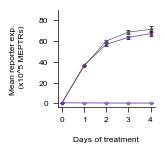

In [107]:
normoxia_gray = [(i/255) for i in [132, 134, 136]]
normox_dox_gray = [(i/255) for i in [88, 89, 91]]

# create figure 1D plot
fig, ax = plt.subplots(1, 1, figsize=(1.75, 1.7), sharey=True)
(_, caps1, _) = ax.errorbar(days, meptrs_normoxia_scaled, std_err_normoxia_scaled, color=normoxia_gray, linestyle="-", marker="o", markersize="1.5", ecolor="k", capsize=1.5, elinewidth=0.5, label="normoxia")
(_, caps2, _) = ax.errorbar(days, meptrs_normoxia_dox_scaled, std_err_normoxia_dox_scaled, color=normox_dox_gray, linestyle="-", marker="o", markersize="1.5", ecolor="k", capsize=1.5, elinewidth=0.5, label="normoxia_dox")
(_, caps3, _) = ax.errorbar(days, meptrs_hypoxia_scaled, std_err_hypoxia_scaled, color="mediumpurple", linestyle="-", marker="o", markersize="1.5", ecolor="k", capsize=1.5, elinewidth=0.5, label="hypoxia")
(_, caps4, _) = ax.errorbar(days, meptrs_hypoxia_dox_scaled, std_err_hypoxia_dox_scaled, color="rebeccapurple", linestyle="-", marker="o", markersize="1.5", ecolor="k", capsize=1.5, elinewidth=0.5, label="hypoxia_dox")
ax.set_xlabel("Days of treatment")
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_ylabel("Mean reporter exp. \n (x10^5 MEPTRs)")
ax.set_ylim(top=90)
ax.set_box_aspect(1)

for cap in caps1:
    cap.set_markeredgewidth(0.5)
for cap in caps2:
    cap.set_markeredgewidth(0.5)
for cap in caps3:
    cap.set_markeredgewidth(0.5)
for cap in caps4:
    cap.set_markeredgewidth(0.5)
# plt.show()
plt.savefig(path_plots+"figure_1d.svg")

## Supplementary Figure 3

### Supplementary Figure 3 statistical tests

In [ ]:
df_all = pd.read_csv(path_exp_data+"Exp03_supplement.csv")
# print(df_all)

In [ ]:
### red fluorescent protein ###
# select data for red only
df_red = df_all[df_all["condition"].str.contains("red")]
# print(df_red)
# run 1 way anova
# anova_table = anova(path_stats, "supp_figure3_red", df_red, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
tukeys_tables = tukeys_hsd(path_stats, "supp_figure3_red", "rfu", df_red, ["condition"])
for table in tukeys_tables:
    print(table)

In [ ]:
### green fluorescent protein ###
# select data for red only
df_green = df_all[df_all["condition"].str.contains("green")]
# run 1 way anova
# anova_table = anova(path_stats, "supp_figure3_green", df_green, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
tukeys_tables = tukeys_hsd(path_stats, "supp_figure3_green", "rfu", df_green, ["condition"])
for table in tukeys_tables:
    print(table)

In [ ]:
### blue fluorescent protein ###
# select data for red only
df_blue = df_all[df_all["condition"].str.contains("blue")]
# run 1 way anova
# anova_table = anova(path_stats, "supp_figure3_blue", df_blue, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
tukeys_tables = tukeys_hsd(path_stats, "supp_figure3_blue", "rfu", df_blue, ["condition"])
for table in tukeys_tables:
    print(table)

### Supplementary Figure 3 plot

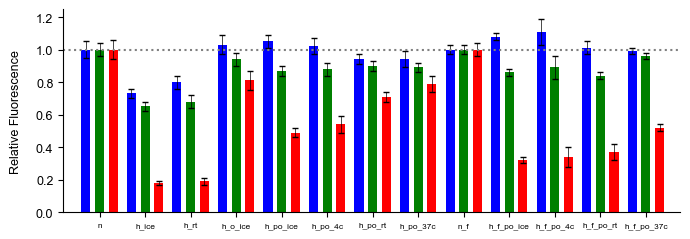

In [36]:
conditions = df_data_plot["condition"].to_list()
plot_xlabels = [conditions[i] for i in range(0, len(conditions), 3)]
rfu = df_data_plot["rfu"].to_list()
plot_rfu = [rfu[i:i + 3] for i in range(0, len(rfu), 3)]
std_err = df_data_plot["std_err"].to_list()
plot_std_err = [std_err[i:i + 3] for i in range(0, len(std_err), 3)]

# create plot
fig, ax = plt.subplots(1, 1, figsize=(7, 2.5))
x_ticks = []
for index, rfu_list in enumerate(plot_rfu):
    ax.bar(index-0.3, rfu_list[2], width=0.2, color="blue", align="center", label="blue")
    ax.errorbar(index-0.3, rfu_list[2], plot_std_err[index][2], color="k", capsize=2, elinewidth=0.5)
    ax.bar(index, rfu_list[1], width=0.2, color="green", align="center", label="green")
    ax.errorbar(index, rfu_list[1], plot_std_err[index][1], color="k", capsize=2, elinewidth=0.5)
    ax.bar(index+0.3, rfu_list[0], width=0.2, color="red", align="center", label="red")
    ax.errorbar(index+0.3, rfu_list[0], plot_std_err[index][0], color="k", capsize=2, elinewidth=0.5)
    x_ticks.append(index)
ax.axhline(y=1.0, color="grey", linestyle="dotted", linewidth=1.5)
ax.set_ylabel("Relative Fluorescence")
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2])
ax.set_xticks(x_ticks)
ax.set_xlim([x_ticks[0]-0.8, x_ticks[-1]+0.75])
ax.set_xticklabels(plot_xlabels)
ax.tick_params(axis='x', which='major', labelsize=6)
# plt.show()
plt.savefig(path_plots+"supp_figure_3.svg")

## Figure 2

### Figure 2D-2E statistical tests

In [ ]:
df = pd.read_csv(path_exp_data+"Exp05_pt1.csv")
print(df)

# run t-tests
comparisons = [
    ["cobalt_0", "cobalt_3"], 
    ["cobalt_0", "cobalt_15"], 
    ["cobalt_0", "cobalt_30"],
    ["cobalt_0", "cobalt_150"],
    ["cobalt_0", "cobalt_300"],
    ["cobalt_0", "cobalt_600"]
]
t_test_df = run_corrected_t_tests(path_stats, "figure2d-e", "meptrs", df, comparisons)
print(t_test_df)

### Figure 2D plot

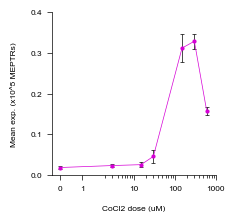

In [5]:
df_data_plot = pd.read_csv(path_exp_data+"plot_figure2D-E.csv")
# print(df_data_plot)
cobalt_doses = df_data_plot["cobalt_dose"].to_list()
meptrs = df_data_plot["meptrs"].to_list()
meptrs_scaled = [i/1E5 for i in meptrs]
std_err = df_data_plot["std_err"].to_list()
std_err_scaled = [i/1E5 for i in std_err]
pink_ = [(i/255) for i in [214, 0, 214]]

# create figure 2D plot
fig, ax = plt.subplots(1, 1, figsize=(2.45, 2.5))
(_, caps, _) = ax.errorbar(cobalt_doses, meptrs_scaled, std_err_scaled, color=pink_, linestyle="-", marker="o", markersize="2", ecolor="k", capsize=1.5, elinewidth=0.5)
ax.set_xscale('symlog', subs=[2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xlim(right=1000)
ax.set_ylim(top=0.4)
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel("CoCl2 dose (uM)")
ax.set_ylabel("Mean exp. (x10^5 MEPTRs)")
# ax.minorticks_on()
ax.tick_params(axis='x', which='minor')
ax.set_box_aspect(1)

for cap in caps:
    cap.set_markeredgewidth(0.5)

# plt.show()
plt.savefig(path_plots+"figure_2d_test.svg")

### Figure 2E plot

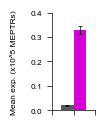

In [11]:
pink_ = [(i/255) for i in [214, 0, 214]]
grey_ = [(i/255) for i in [88, 89, 91]]

fig, ax = plt.subplots(1, 1, figsize=(1.15, 1.35))

ax.bar(-0.15, meptrs_scaled[0], width=0.3, color=grey_, align="center", label="untreated")
ax.bar(0.15, meptrs_scaled[-2], width=0.3, color=pink_, align="center", label="cobalt")
(_, caps1, _) = ax.errorbar(-0.15, meptrs_scaled[0], std_err_scaled[0], color="k", capsize=1.5, elinewidth=0.5)
(_, caps2, _) = ax.errorbar(0.15, meptrs_scaled[-2], std_err_scaled[-2], color="k", capsize=1.5, elinewidth=0.5)
ax.set_xlim([-0.5, 0.5])
ax.set_xticklabels([])
ax.set_ylim(top=0.4)
# ax.set_yticks([0.0, 0., 2, 3])
ax.set_ylabel("Mean exp. (x10^5 MEPTRs)")

for cap in caps1:
    cap.set_markeredgewidth(0.5)

for cap in caps2:
    cap.set_markeredgewidth(0.5)

# plt.show()
plt.savefig(path_plots+"figure_2e_test.svg")

### Figure 2G statistical tests

In [ ]:
df = pd.read_csv(path_exp_data+"Exp05_pt2_bins.csv")
# print(df)

# run 2-way ANOVA
# anova_table = anova(path_stats, "figure2g", df, "meptrs", "condition", "bin")
# print(anova_table)
# run tukey's hsd
# tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure2g", "meptrs", df, ["condition", "bin"], ["condition","bin"])
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

In [ ]:
# run 1 way ANOVA on fold induction for each condition
df_fold = df[df["fold"] != 1]
# print(df_fold)
# anova_table = anova(path_stats, "figure2g_fold", df_fold, "fold", "bin")
# print(anova_table)
# run tukey's hsd
# tukeys_tables = tukeys_hsd(path_stats, "figure2g_fold", "fold", df_fold, ["bin"])
# for table in tukeys_tables:
#     print(table)

### Figure 2G/H plot

In [12]:
df_data_plot2g = pd.read_csv(path_exp_data+"plot_figure2G.csv")
# print(df_data_plot2g)
# format data and labels for plotting
meptrs2g = df_data_plot2g["meptrs"].to_list()
meptrs_scaled2g = [i/1E5 for i in meptrs2g]
# print(meptrs_scaled2g)
plot_meptrs2g = [meptrs_scaled2g[i:i + 2] for i in range(0, len(meptrs_scaled2g), 2)]
std_err2g = df_data_plot2g["std_err"].to_list()
std_err_scaled2g = [i/1E5 for i in std_err2g]
plot_std_err2g = [std_err_scaled2g[i:i + 2] for i in range(0, len(std_err_scaled2g), 2)]
fi2g = df_data_plot2g["FI"].to_list()
plot_fi2g = [fi2g[i] for i in range(1, len(fi2g), 2)]
fi_std_err2g = df_data_plot2g["FI_std_err"].to_list()
plot_fi_std_err2g = [fi_std_err2g[i] for i in range(1, len(fi_std_err2g), 2)]

In [13]:
df_data_plot2h = pd.read_csv(path_exp_data+"plot_figure2H.csv")
# print(df_data_plot2h)
# format data and labels for plotting
meptrs2h = df_data_plot2h["meptrs"].to_list()
meptrs_scaled2h = [i/1E5 for i in meptrs2h]
plot_meptrs2h = [meptrs_scaled2h[i:i + 2] for i in range(0, len(meptrs_scaled2h), 2)]
std_err2h = df_data_plot2h["std_err"].to_list()
std_err_scaled2h = [i/1E5 for i in std_err2h]
plot_std_err2h = [std_err_scaled2h[i:i + 2] for i in range(0, len(std_err_scaled2h), 2)]
fi2h = df_data_plot2h["FI"].to_list()
plot_fi2h = [fi2h[i] for i in range(1, len(fi2h), 2)]
fi_std_err2h = df_data_plot2h["FI_std_err"].to_list()
plot_fi_std_err2h = [fi_std_err2h[i] for i in range(1, len(fi_std_err2h), 2)]

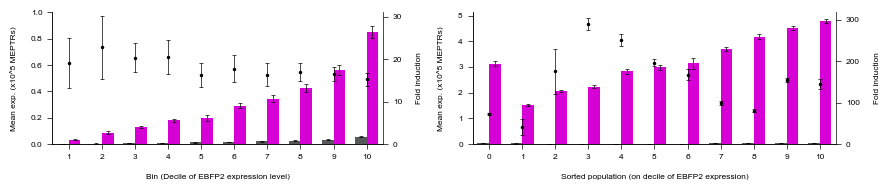

In [16]:
pink_ = [(i/255) for i in [214, 0, 214]]
grey_ = [(i/255) for i in [88, 89, 91]]
# create plot
fig, axs = plt.subplots(1, 2, figsize=(9, 2), gridspec_kw={
                           'width_ratios': [1, 1.1]})
axs0_2 = axs[0].twinx()
axs1_2 = axs[1].twinx()
for index, meptrs_list in enumerate(plot_meptrs2g):
    axs[0].bar(index+1-0.175, meptrs_list[0], width=0.35, color=grey_, align="center", label="untreated")
    (_, caps1, _) = axs[0].errorbar(index+1-0.175, meptrs_list[0], plot_std_err2g[index][0], color="k", capsize=1.5, elinewidth=0.5)
    axs[0].bar(index+1+0.175, meptrs_list[1], width=0.35, color=pink_, align="center", label="cobalt")
    (_, caps2, _) = axs[0].errorbar(index+1+0.175, meptrs_list[1], plot_std_err2g[index][1], color="k", capsize=1.5, elinewidth=0.5)
    (_, caps3, _) = axs0_2.errorbar(index+1, plot_fi2g[index], plot_fi_std_err2g[index], color="k", marker="o", markersize="1.5", linestyle="none", ecolor="k", capsize=1.5, elinewidth=0.5)

    for cap in caps1:
        cap.set_markeredgewidth(0.5)
    for cap in caps2:
        cap.set_markeredgewidth(0.5)
    for cap in caps3:
        cap.set_markeredgewidth(0.5)
axs[0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
axs[0].set_xlim(left=0.5, right=10.5)
axs[0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[0].set_xlabel("Bin (Decile of EBFP2 expression level)")
axs[0].set_ylabel("Mean exp. (x10^5 MEPTRs)")
axs[0].spines[['right']].set_visible(True)
axs0_2.set_yticks([0, 10, 20, 30])
axs0_2.set_ylabel("Fold induction")


for index, meptrs_list in enumerate(plot_meptrs2h):
    axs[1].bar(index-0.175, meptrs_list[0], width=0.35, color=grey_, align="center", label="untreated")
    (_, caps1, _) = axs[1].errorbar(index-0.175, meptrs_list[0], plot_std_err2h[index][0], color="k", capsize=1.5, elinewidth=0.5)
    axs[1].bar(index+0.175, meptrs_list[1], width=0.35, color=pink_, align="center", label="cobalt")
    (_, caps2, _) = axs[1].errorbar(index+0.175, meptrs_list[1], plot_std_err2h[index][1], color="k", capsize=1.5, elinewidth=0.5)
    (_, caps3, _) = axs1_2.errorbar(index, plot_fi2h[index], plot_fi_std_err2h[index], color="k", marker="o", markersize="1.5", linestyle="none", ecolor="k", capsize=1.5, elinewidth=0.5)

    for cap in caps1:
        cap.set_markeredgewidth(0.5)
    for cap in caps2:
        cap.set_markeredgewidth(0.5)
    for cap in caps3:
        cap.set_markeredgewidth(0.5)

axs[1].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
axs[1].set_xlim(left=-0.5, right=10.5)
axs[1].set_yticks([0, 1, 2, 3, 4, 5])
axs[1].set_xlabel("Sorted population (on decile of EBFP2 expression)")
axs[1].set_ylabel("Mean exp. (x10^5 MEPTRs)")
axs[1].spines[['right']].set_visible(True)
axs1_2.set_yticks([0, 100, 200, 300])
axs1_2.set_ylabel("Fold induction")

# plt.show()
plt.savefig(path_plots+"figure_2gh_test.svg")

### Figure 2H statistical tests

In [4]:
df = pd.read_csv(path_exp_data+"Exp06.csv")
# print(df)


In [ ]:

# run 2-way ANOVA
anova_table = anova(path_stats, "figure2h", df, "meptrs", "condition", "sorted_population")
print(anova_table)
# run tukey's hsd
# tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure2h", "meptrs", df, ["condition", "sorted_population"], ["condition","sorted_population"])
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

### Figure 2H plot

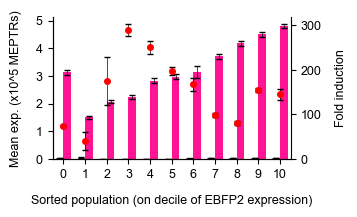

In [38]:
#plot
df_data_plot = pd.read_csv(path_exp_data+"plot_figure2H.csv")
# print(df_data_plot)

# format data and labels for plotting
meptrs = df_data_plot["meptrs"].to_list()
meptrs_scaled = [i/1E5 for i in meptrs]
plot_meptrs = [meptrs_scaled[i:i + 2] for i in range(0, len(meptrs_scaled), 2)]
std_err = df_data_plot["std_err"].to_list()
std_err_scaled = [i/1E5 for i in std_err]
plot_std_err = [std_err_scaled[i:i + 2] for i in range(0, len(std_err_scaled), 2)]
fi = df_data_plot["FI"].to_list()
plot_fi = [fi[i] for i in range(1, len(fi), 2)]
fi_std_err = df_data_plot["FI_std_err"].to_list()
plot_fi_std_err = [fi_std_err[i] for i in range(1, len(fi_std_err), 2)]
# create plot
fig, ax = plt.subplots(1, 1, figsize=(3.675, 2.25))
ax2 = ax.twinx()
for index, meptrs_list in enumerate(plot_meptrs):
    ax.bar(index-0.175, meptrs_list[0], width=0.35, color="grey", align="center", label="untreated")
    ax.errorbar(index-0.175, meptrs_list[0], plot_std_err[index][0], color="k", capsize=2, elinewidth=0.5)
    ax.bar(index+0.175, meptrs_list[1], width=0.35, color="deeppink", align="center", label="cobalt")
    ax.errorbar(index+0.175, meptrs_list[1], plot_std_err[index][1], color="k", capsize=2, elinewidth=0.5)
    ax2.errorbar(index, plot_fi[index], plot_fi_std_err[index], color="red", marker="o", markersize="4", linestyle="none", ecolor="k", capsize=2, elinewidth=0.5)

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xlim(left=-0.5, right=10.5)
ax.set_yticks([0, 1, 2, 3, 4, 5])
ax.set_xlabel("Sorted population (on decile of EBFP2 expression)")
ax.set_ylabel("Mean exp. (x10^5 MEPTRs)")
ax.spines[['right']].set_visible(True)
ax2.set_yticks([0, 100, 200, 300])
ax2.set_ylabel("Fold induction")
# plt.show()
# plt.savefig(path_plots+"figure_2h.svg")

## Figure 3

### Figure 3B, left statistical tests

In [9]:
df = pd.read_csv(path_exp_data+"Exp07_pt1_HEK.csv")
# print(df)

In [13]:
# run 2-way ANOVA
anova_table = anova(path_stats, "figure3b_left", df, "mefls", "condition", "minimal_promoter")
# print(anova_table)
# run tukey's hsd
tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure3b_left", "mefls", df, ["condition", "minimal_promoter"], ["condition","minimal_promoter"])
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)c

### Figure 3B, left plot

In [99]:
#plot
df_data_plot = pd.read_csv(path_exp_data+"plot_figure3B_left.csv")
# print(df_data_plot)

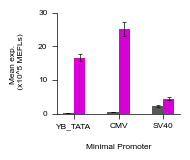

In [100]:
pink_ = [(i/255) for i in [214, 0, 214]]
grey_ = [(i/255) for i in [88, 89, 91]]
# format data and labels for plotting
conditions = df_data_plot["minimal_promoter"].to_list()
plot_xlabels = [conditions[i] for i in range(0, len(conditions), 2)]
mefls = df_data_plot["mefls"].to_list()
mefls_scaled = [i/1E5 for i in mefls]
plot_mefls = [mefls_scaled[i:i + 2] for i in range(0, len(mefls_scaled), 2)]
std_err = df_data_plot["std_err"].to_list()
std_err_scaled = [i/1E5 for i in std_err]
plot_std_err = [std_err_scaled[i:i + 2] for i in range(0, len(std_err_scaled), 2)]

# create plot
fig, ax = plt.subplots(1, 1, figsize=(2, 1.7))
x_ticks = []
for index, mefls_list in enumerate(plot_mefls):
    ax.bar(index-0.125, mefls_list[0], width=0.25, color=grey_, align="center", label="untreated")
    (_, caps1, _) = ax.errorbar(index-0.125, mefls_list[0], plot_std_err[index][0], color="k", capsize=1.5, elinewidth=0.5)
    ax.bar(index+0.125, mefls_list[1], width=0.25, color=pink_, align="center", label="cobalt")
    (_, caps2, _) = ax.errorbar(index+0.125, mefls_list[1], plot_std_err[index][1], color="k", capsize=1.5, elinewidth=0.5)
    x_ticks.append(index)

    for cap in caps1:
        cap.set_markeredgewidth(0.5)
    for cap in caps2:
        cap.set_markeredgewidth(0.5)
ax.set_xticks(x_ticks)
ax.set_xticklabels(plot_xlabels)
ax.set_yticks([0, 10, 20, 30])
ax.set_xlabel("Minimal Promoter")
ax.set_ylabel("Mean exp. \n (x10^5 MEFLs)")
# plt.show()
plt.savefig(path_plots+"figure_3b_left.svg")

### Figure 3B, right statistical tests

In [49]:
df = pd.read_csv(path_exp_data+"Exp07_pt2_B16.csv")
print(df)

    condition minimal_promoter  replicate      mefls
0   untreated             SV40          1    86200.0
1   untreated             SV40          2   124000.0
2   untreated             SV40          3   122000.0
3   untreated          YB_TATA          1    20400.0
4   untreated          YB_TATA          2    29900.0
5   untreated          YB_TATA          3    28200.0
6   untreated              CMV          1   124000.0
7   untreated              CMV          2   148000.0
8   untreated              CMV          3   117000.0
9      cobalt             SV40          1  1440000.0
10     cobalt             SV40          2  1330000.0
11     cobalt             SV40          3  1330000.0
12     cobalt          YB_TATA          1   461000.0
13     cobalt          YB_TATA          2   332000.0
14     cobalt          YB_TATA          3   409000.0
15     cobalt              CMV          1  1010000.0
16     cobalt              CMV          2  1190000.0
17     cobalt              CMV          3  139

In [53]:
# run 2-way ANOVA
anova_table = anova(path_stats, "figure3b_right", df, "mefls", "condition", "minimal_promoter")
# print(anova_table)
# run tukey's hsd
tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure3b_right", "mefls", df, ["condition", "minimal_promoter"], ["condition","minimal_promoter"])
# print(tukeys_table_i)
# for table in tukeys_tables:
    # print(table)

### Figure 3B, right plot

In [97]:
#plot
df_data_plot = pd.read_csv(path_exp_data+"plot_figure3B_right.csv")
# print(df_data_plot)

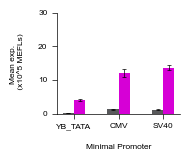

In [98]:
pink_ = [(i/255) for i in [214, 0, 214]]
grey_ = [(i/255) for i in [88, 89, 91]]

# format data and labels for plotting
conditions = df_data_plot["minimal_promoter"].to_list()
plot_xlabels = [conditions[i] for i in range(0, len(conditions), 2)]
mefls = df_data_plot["mefls"].to_list()
mefls_scaled = [i/1E5 for i in mefls]
plot_mefls = [mefls_scaled[i:i + 2] for i in range(0, len(mefls_scaled), 2)]
std_err = df_data_plot["std_err"].to_list()
std_err_scaled = [i/1E5 for i in std_err]
plot_std_err = [std_err_scaled[i:i + 2] for i in range(0, len(std_err_scaled), 2)]

# create plot
fig, ax = plt.subplots(1, 1, figsize=(2, 1.7))
x_ticks = []
for index, mefls_list in enumerate(plot_mefls):
    ax.bar(index-0.125, mefls_list[0], width=0.25, color=grey_, align="center", label="untreated")
    (_, caps1, _) = ax.errorbar(index-0.125, mefls_list[0], plot_std_err[index][0], color="k", capsize=1.5, elinewidth=0.5)
    ax.bar(index+0.125, mefls_list[1], width=0.25, color=pink_, align="center", label="cobalt")
    (_, caps2, _) = ax.errorbar(index+0.125, mefls_list[1], plot_std_err[index][1], color="k", capsize=1.5, elinewidth=0.5)
    x_ticks.append(index)

    for cap in caps1:
        cap.set_markeredgewidth(0.5)
    for cap in caps2:
        cap.set_markeredgewidth(0.5)
ax.set_xticks(x_ticks)
ax.set_xticklabels(plot_xlabels)
ax.set_yticks([0, 10, 20, 30])
ax.set_xlabel("Minimal Promoter")
ax.set_ylabel("Mean exp. \n (x10^5 MEFLs)")
# plt.show()
plt.savefig(path_plots+"figure_3b_right.svg")

### Figure 3C, top statistical tests

In [26]:
df = pd.read_csv(path_exp_data+"Exp04_pt2_YBTATA.csv")
# print(df)

In [28]:
# run 2-way repeated measures ANOVA
# anova_rm_table = repeated_measures_anova(path_stats, "figure3c_top", df, "meptrs", "day", "condition")
# print(anova_rm_table)

# run tukey's hsd
# tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure3c_top", "meptrs", df, ["condition", "day"], ["condition","day"]) 
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

### Figure 3C, top plot

In [108]:
df_plot = pd.read_csv(path_exp_data+"plot_figure3C_top.csv")
# print(df_plot)
days = [0, 1, 2, 3, 4]

In [109]:
# normoxia data
meptrs_normoxia = df_plot[df_plot["condition"] == "normoxia"]["meptrs"].to_list()
meptrs_normoxia_scaled = [i/1E5 for i in meptrs_normoxia]
std_err_normoxia = df_plot[df_plot["condition"] == "normoxia"]["std_err"].to_list()
std_err_normoxia_scaled = [i/1E5 for i in std_err_normoxia]

In [110]:
# normoxia + cobalt data
meptrs_normoxia_cobalt = df_plot[df_plot["condition"] == "normoxia_cobalt"]["meptrs"].to_list()
meptrs_normoxia_cobalt_scaled = [i/1E5 for i in meptrs_normoxia_cobalt]
std_err_normoxia_cobalt = df_plot[df_plot["condition"] == "normoxia_cobalt"]["std_err"].to_list()
std_err_normoxia_cobalt_scaled = [i/1E5 for i in std_err_normoxia_cobalt]

In [111]:
# hypoxia data
meptrs_hypoxia = df_plot[df_plot["condition"] == "hypoxia"]["meptrs"].to_list()
meptrs_hypoxia_scaled = [i/1E5 for i in meptrs_hypoxia]
std_err_hypoxia = df_plot[df_plot["condition"] == "hypoxia"]["std_err"].to_list()
std_err_hypoxia_scaled = [i/1E5 for i in std_err_hypoxia]

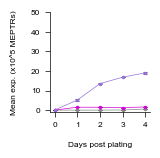

In [112]:
pink_ = [(i/255) for i in [214, 0, 214]]
normoxia_gray = [(i/255) for i in [132, 134, 136]]

# create figure 2D plot
fig, ax = plt.subplots(1, 1, figsize=(1.7, 1.7), sharey=True)
(_, caps1, _) = ax.errorbar(days, meptrs_normoxia_scaled, std_err_normoxia_scaled, color=normoxia_gray, linestyle="-", marker="o", markersize="1.5", ecolor="k", capsize=1.5, elinewidth=0.5, label="normoxia")
(_, caps2, _) = ax.errorbar(days, meptrs_normoxia_cobalt_scaled, std_err_normoxia_cobalt_scaled, color=pink_, linestyle="-", marker="o", markersize="1.5", ecolor="k", capsize=1.5, elinewidth=0.5, label="normoxia_cobalt")
(_, caps3, _) = ax.errorbar(days, meptrs_hypoxia_scaled, std_err_hypoxia_scaled, color="mediumpurple", linestyle="-", marker="o", markersize="1.5", ecolor="k", capsize=1.5, elinewidth=0.5, label="hypoxia")
ax.set_xlabel("Days post plating")
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_ylabel("Mean exp. (x10^5 MEPTRs)")
ax.set_yticks([0, 10, 20, 30, 40, 50])
ax.set_ylim(top=50)
ax.set_box_aspect(1)

for cap in caps1:
    cap.set_markeredgewidth(0.5)
for cap in caps2:
    cap.set_markeredgewidth(0.5)
for cap in caps3:
    cap.set_markeredgewidth(0.5)

# plt.show()
plt.savefig(path_plots+"figure_3c_top.svg")

### Figure 3C, bottom statistical tests

In [37]:
df = pd.read_csv(path_exp_data+"Exp04_pt3_CMV.csv")
# print(df)

In [39]:
# run 2-way repeated measures ANOVA
# anova_rm_table = repeated_measures_anova(path_stats, "figure3c_bottom", df, "meptrs", "day", "condition")
# print(anova_rm_table)

# run tukey's hsd
# tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure3c_bottom", "meptrs", df, ["condition", "day"], ["condition","day"]) 
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

### Figure 3C, bottom plot

In [113]:
df_plot = pd.read_csv(path_exp_data+"plot_figure3C_bottom.csv")
# print(df_plot)
days = [0, 1, 2, 3, 4]

In [114]:
# normoxia data
meptrs_normoxia = df_plot[df_plot["condition"] == "normoxia"]["meptrs"].to_list()
meptrs_normoxia_scaled = [i/1E5 for i in meptrs_normoxia]
std_err_normoxia = df_plot[df_plot["condition"] == "normoxia"]["std_err"].to_list()
std_err_normoxia_scaled = [i/1E5 for i in std_err_normoxia]

In [115]:
# normoxia + cobalt data
meptrs_normoxia_cobalt = df_plot[df_plot["condition"] == "normoxia_cobalt"]["meptrs"].to_list()
meptrs_normoxia_cobalt_scaled = [i/1E5 for i in meptrs_normoxia_cobalt]
std_err_normoxia_cobalt = df_plot[df_plot["condition"] == "normoxia_cobalt"]["std_err"].to_list()
std_err_normoxia_cobalt_scaled = [i/1E5 for i in std_err_normoxia_cobalt]

In [116]:
# hypoxia data
meptrs_hypoxia = df_plot[df_plot["condition"] == "hypoxia"]["meptrs"].to_list()
meptrs_hypoxia_scaled = [i/1E5 for i in meptrs_hypoxia]
std_err_hypoxia = df_plot[df_plot["condition"] == "hypoxia"]["std_err"].to_list()
std_err_hypoxia_scaled = [i/1E5 for i in std_err_hypoxia]

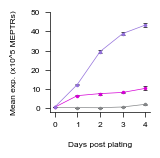

In [117]:
pink_ = [(i/255) for i in [214, 0, 214]]
normoxia_gray = [(i/255) for i in [132, 134, 136]]

# create figure 2D plot
fig, ax = plt.subplots(1, 1, figsize=(1.7, 1.7), sharey=True)
(_, caps1, _) = ax.errorbar(days, meptrs_normoxia_scaled, std_err_normoxia_scaled, color=normoxia_gray, linestyle="-", marker="o", markersize="1.5", ecolor="k", capsize=1.5, elinewidth=0.5, label="normoxia")
(_, caps2, _) = ax.errorbar(days, meptrs_normoxia_cobalt_scaled, std_err_normoxia_cobalt_scaled, color=pink_, linestyle="-", marker="o", markersize="1.5", ecolor="k", capsize=1.5, elinewidth=0.5, label="normoxia_cobalt")
(_, caps3, _) = ax.errorbar(days, meptrs_hypoxia_scaled, std_err_hypoxia_scaled, color="mediumpurple", linestyle="-", marker="o", markersize="1.5", ecolor="k", capsize=1.5, elinewidth=0.5, label="hypoxia")
ax.set_xlabel("Days post plating")
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_ylabel("Mean exp. (x10^5 MEPTRs)")
ax.set_yticks([0, 10, 20, 30, 40, 50])
ax.set_ylim(top=50)
ax.set_box_aspect(1)

for cap in caps1:
    cap.set_markeredgewidth(0.5)
for cap in caps2:
    cap.set_markeredgewidth(0.5)
for cap in caps3:
    cap.set_markeredgewidth(0.5)

# plt.show()
plt.savefig(path_plots+"figure_3c_bottom.svg")

## Figure 4

### Figure 4B statistical tests

In [46]:
df = pd.read_csv(path_exp_data+"Exp04_pt4_dox_HIF.csv")
# print(df)

In [49]:
# run 2-way repeated measures ANOVA
# anova_rm_table = repeated_measures_anova(path_stats, "figure4b", df, "meptrs", "day", "condition")
# print(anova_rm_table)

# run tukey's hsd
# tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure4b", "meptrs", df, ["condition", "day"], ["condition","day"]) 
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

### Figure 4B plot

In [73]:
df_data_plot = pd.read_csv(path_exp_data+"plot_figure4B.csv")
# print(df_data_plot)
days = [0, 1, 2, 3, 4]

In [74]:
# normoxia data
meptrs_normoxia = df_data_plot[df_data_plot["condition"] == "normoxia"]["meptrs"].to_list()
meptrs_normoxia_scaled = [i/1E5 for i in meptrs_normoxia]
std_err_normoxia = df_data_plot[df_data_plot["condition"] == "normoxia"]["std_err"].to_list()
std_err_normoxia_scaled = [i/1E5 for i in std_err_normoxia]

In [75]:
# normoxia cobalt data
meptrs_normoxia_cobalt = df_data_plot[df_data_plot["condition"] == "normoxia_cobalt"]["meptrs"].to_list()
meptrs_normoxia_cobalt_scaled = [i/1E5 for i in meptrs_normoxia_cobalt]
std_err_normoxia_cobalt = df_data_plot[df_data_plot["condition"] == "normoxia_cobalt"]["std_err"].to_list()
std_err_normoxia_cobalt_scaled = [i/1E5 for i in std_err_normoxia_cobalt]

In [76]:
# normoxia dox data
meptrs_normoxia_dox = df_data_plot[df_data_plot["condition"] == "normoxia_dox"]["meptrs"].to_list()
meptrs_normoxia_dox_scaled = [i/1E5 for i in meptrs_normoxia_dox]
std_err_normoxia_dox = df_data_plot[df_data_plot["condition"] == "normoxia_dox"]["std_err"].to_list()
std_err_normoxia_dox_scaled = [i/1E5 for i in std_err_normoxia_dox]

In [77]:
# hypoxia data
meptrs_hypoxia = df_data_plot[df_data_plot["condition"] == "hypoxia"]["meptrs"].to_list()
meptrs_hypoxia_scaled = [i/1E5 for i in meptrs_hypoxia]
std_err_hypoxia = df_data_plot[df_data_plot["condition"] == "hypoxia"]["std_err"].to_list()
std_err_hypoxia_scaled = [i/1E5 for i in std_err_hypoxia]

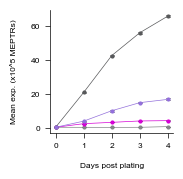

In [79]:
pink_ = [(i/255) for i in [214, 0, 214]]
normoxia_gray = [(i/255) for i in [132, 134, 136]]
normox_dox_gray = [(i/255) for i in [88, 89, 91]]

# create figure 2D plot
fig, ax = plt.subplots(1, 1, figsize=(1.935, 2))
(_, caps1, _) = ax.errorbar(days, meptrs_normoxia_scaled, std_err_normoxia_scaled, color=normoxia_gray, linestyle="-", marker="o", markersize="2", ecolor="k", capsize=1.5, elinewidth=0.5, label="normoxia")
(_, caps2, _) = ax.errorbar(days, meptrs_normoxia_cobalt_scaled, std_err_normoxia_cobalt_scaled, color=pink_, linestyle="-", marker="o", markersize="2", ecolor="k", capsize=1.5, elinewidth=0.5, label="normoxia_cobalt")
(_, caps3, _) = ax.errorbar(days, meptrs_normoxia_dox_scaled, std_err_normoxia_dox_scaled, color=normox_dox_gray, linestyle="-", marker="o", markersize="2", ecolor="k", capsize=1.5, elinewidth=0.5, label="normoxia_dox")
(_, caps4, _) = ax.errorbar(days, meptrs_hypoxia_scaled, std_err_hypoxia_scaled, color="mediumpurple", linestyle="-", marker="o", markersize="2", ecolor="k", capsize=1.5, elinewidth=0.5, label="hypoxia")
ax.set_xlabel("Days post plating")
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_ylabel("Mean exp. (x10^5 MEPTRs)")
# ax.set_ylim(top=6.0)
ax.set_box_aspect(1)

for cap in caps1:
    cap.set_markeredgewidth(0.5)
for cap in caps2:
    cap.set_markeredgewidth(0.5)
for cap in caps3:
    cap.set_markeredgewidth(0.5)
for cap in caps4:
    cap.set_markeredgewidth(0.5)
# plt.show()
plt.savefig(path_plots+"figure_4b.svg")

## Figure 5

### Figure 5B statistical tests

In [6]:
df = pd.read_csv(path_exp_data+"Exp09_pt1_promoters.csv")
# print(df)
df_promoters = df[~(df["minimal_promoter"].str.contains("x"))].copy()
# print(df_promoters)
df_yb_tata = df[df["minimal_promoter"].str.contains("YB")].copy()
# print(df_yb_tata)

#### Figure 5B promoter comparison statistical tests

In [9]:
# run 2-way ANOVA
anova_table = anova(path_stats, "figure5b_promoters", df_promoters, "meptrs", "condition", "minimal_promoter")
# print(anova_table)
# run tukey's hsd
tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure5b_promoters", "meptrs", df_promoters, ["condition", "minimal_promoter"], ["condition","minimal_promoter"])
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

#### Figure 5B copy number comparison statistical tests

In [11]:
# run 2-way ANOVA
anova_table = anova(path_stats, "figure5b_yb_tata", df_yb_tata, "meptrs", "condition", "minimal_promoter")
# print(anova_table)
# run tukey's hsd
tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure5b_yb_tata", "meptrs", df_yb_tata, ["condition", "minimal_promoter"], ["condition","minimal_promoter"])
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

### Figure 5B plot

In [38]:
#plot
df_data_plot5B = pd.read_csv(path_exp_data+"plot_figure5B.csv")
print(df_data_plot5B)


  condition minimal_promoter     meptrs       std_err
0  normoxic          YB_TATA    5490.72   1195.279443
1   hypoxic          YB_TATA  381585.36  27636.617460
2  normoxic              CMV   44499.76  12688.202140
3   hypoxic              CMV  297190.96  35060.770960
4  normoxic             SV40  230147.76  39100.312240
5   hypoxic             SV40  628930.16  11944.474790
6  normoxic    YB_TATA_hbsx3    3817.92   1199.759371
7   hypoxic    YB_TATA_hbsx3  101342.16   5229.821873
8  normoxic    YB_TATA_hbsx4    9813.76   2027.352749
9   hypoxic    YB_TATA_hbsx4  139422.96   7804.550978


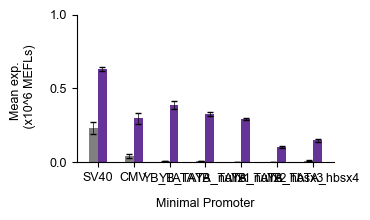

In [70]:
# format data and labels for plotting
conditions = df_data_plot["minimal_promoter"].to_list()
plot_xlabels = [conditions[i] for i in range(0, len(conditions), 2)]
meptrs = df_data_plot["meptrs"].to_list()
meptrs_scaled = [i/1E5 for i in meptrs]
plot_meptrs = [meptrs_scaled[i:i + 2] for i in range(0, len(meptrs_scaled), 2)]
std_err = df_data_plot["std_err"].to_list()
std_err_scaled = [i/1E5 for i in std_err]
plot_std_err = [std_err_scaled[i:i + 2] for i in range(0, len(std_err_scaled), 2)]

# create plot
fig, ax = plt.subplots(1, 1, figsize=(3.8, 2.3))
x_ticks = []
for index, meptrs_list in enumerate(plot_meptrs):
    ax.bar(index-0.125, meptrs_list[0], width=0.25, color="grey", align="center", label="normoxic")
    ax.errorbar(index-0.125, meptrs_list[0], plot_std_err[index][0], color="k", capsize=2, elinewidth=0.5)
    ax.bar(index+0.125, meptrs_list[1], width=0.25, color="rebeccapurple", align="center", label="hypoxic")
    ax.errorbar(index+0.125, meptrs_list[1], plot_std_err[index][1], color="k", capsize=2, elinewidth=0.5)
    x_ticks.append(index)

ax.set_xticks(x_ticks)
ax.set_xticklabels(plot_xlabels)
ax.set_yticks([0, 0.5, 1])
ax.set_xlabel("Minimal Promoter")
ax.set_ylabel("Mean exp. \n (x10^6 MEFLs)")
# plt.show()
plt.savefig(path_plots+"figure_5b.svg")

### Figure 5D statistical tests

In [13]:
df = pd.read_csv(path_exp_data+"Exp09_pt2_feedback.csv")
# print(df)

In [15]:
# run 2-way ANOVA
anova_table = anova(path_stats, "figure5d", df, "meptrs", "condition", "topology")
# print(anova_table)
# run tukey's hsd
tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure5d", "meptrs", df, ["condition", "topology"], ["condition","topology"])
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

### Figure 5D plot

In [69]:
#plot
df_data_plot5D = pd.read_csv(path_exp_data+"plot_figure5D.csv")
df_data_plot5D = df_data_plot5D.copy()[df_data_plot5D["minimal_promoter"] != "YB_TATA"]
print(df_data_plot5D)

  condition  minimal_promoter      meptrs       std_err
2  normoxic      h1a_feedback    23671.76   2624.555342
3   hypoxic      h1a_feedback  1112205.36  32390.193900
4  normoxic      h2a_feedback    31609.36   6384.682090
5   hypoxic      h2a_feedback   680590.16  12303.164620
6  normoxic     h1ab_feedback    38825.36   9324.980177
7   hypoxic     h1ab_feedback   729691.76  11947.495370
8  normoxic  h2a_h1b_feedback    53880.56   2585.475370
9   hypoxic  h2a_h1b_feedback   748322.16  17878.325450


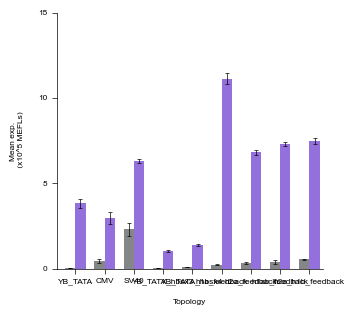

In [80]:
normoxia_gray = [(i/255) for i in [132, 134, 136]]

# format data and labels for plotting
conditions = df_data_plot5B["minimal_promoter"].to_list() + df_data_plot5D["minimal_promoter"].to_list()
plot_xlabels = [conditions[i] for i in range(0, len(conditions), 2)]
# print(plot_xlabels)
meptrs = df_data_plot5B["meptrs"].to_list() + df_data_plot5D["meptrs"].to_list()
# print(meptrs)
meptrs_scaled = [i/1E5 for i in meptrs]
plot_meptrs = [meptrs_scaled[i:i + 2] for i in range(0, len(meptrs_scaled), 2)]
std_err = df_data_plot5B["std_err"].to_list() + df_data_plot5D["std_err"].to_list()
std_err_scaled = [i/1E5 for i in std_err]
plot_std_err = [std_err_scaled[i:i + 2] for i in range(0, len(std_err_scaled), 2)]

# # create plot
fig, ax = plt.subplots(1, 1, figsize=(3.65, 3.25))
x_ticks = []
for index, meptrs_list in enumerate(plot_meptrs):
    ax.bar(index-0.175, meptrs_list[0], width=0.35, color=normoxia_gray, align="center", label="normoxic")
    (_, caps1, _) = ax.errorbar(index-0.175, meptrs_list[0], plot_std_err[index][0], color="k", capsize=1.5, elinewidth=0.5)
    ax.bar(index+0.175, meptrs_list[1], width=0.35, color="mediumpurple", align="center", label="hypoxic")
    (_, caps2, _) = ax.errorbar(index+0.175, meptrs_list[1], plot_std_err[index][1], color="k", capsize=1.5, elinewidth=0.5)
    x_ticks.append(index)

    for cap in caps1:
        cap.set_markeredgewidth(0.5)
    for cap in caps2:
        cap.set_markeredgewidth(0.5)

ax.set_xticks(x_ticks)
ax.set_xlim([-0.625, 8.45])
ax.set_xticklabels(plot_xlabels)
ax.set_yticks([0, 5, 10, 15])
ax.set_xlabel("Topology")
ax.set_ylabel("Mean exp. \n (x10^5 MEFLs)")


# plt.show()
plt.savefig(path_plots+"figure_5c_test.svg")

### Figure 5E Statistical Tests

In [83]:
df = pd.read_csv(path_exp_data+"Exp10.csv")
df_hypoxic = df[df["day"] != "normoxic"].copy()
print(df_hypoxic)

     condition day  subject         meptrs
0   simple_hbs   0        0   11514.629500
1   simple_hbs   0        1   12114.072270
2   simple_hbs   0        2   12493.719360
3   simple_hbs   1        0  162514.807700
4   simple_hbs   1        1  143389.324600
5   simple_hbs   1        2  158729.555800
6   simple_hbs   2        0  291898.522100
7   simple_hbs   2        1  252109.355900
8   simple_hbs   2        2  252109.355900
9   simple_hbs   3        0  342822.513400
10  simple_hbs   3        1  345264.443100
11  simple_hbs   3        2  322676.593200
12  simple_hbs   4        0  371329.615500
13  simple_hbs   4        1  373490.999000
14  simple_hbs   4        2  365827.912100
18  h1a_fb_hbs   0        3   23043.912050
19  h1a_fb_hbs   0        4   23243.726310
20  h1a_fb_hbs   0        5   23243.726310
21  h1a_fb_hbs   1        3  390825.261400
22  h1a_fb_hbs   1        4  297588.531600
23  h1a_fb_hbs   1        5  382457.862600
24  h1a_fb_hbs   2        3  541230.634100
25  h1a_fb_

In [85]:
# run 2-way repeated measures ANOVA
# anova_rm_table = repeated_measures_anova(path_stats, "figure5e", df_hypoxic, "meptrs", "day", "condition")
# print(anova_rm_table)

# run tukey's hsd
# tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure5e", "meptrs", df_hypoxic, ["condition", "day"], ["condition","day"]) 
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

# run t-tests for each day vs. normoxia for simple, h1a fb, h2a fb
# format df for t-test code
# df["condition"] = df["condition"] + "_" + df["day"].astype(str)
# print(df)
# comparisons = [
#     ["simple_hbs_0", "simple_hbs_normoxic"],
#     ["simple_hbs_1", "simple_hbs_normoxic"],
#     ["simple_hbs_2", "simple_hbs_normoxic"],
#     ["simple_hbs_3", "simple_hbs_normoxic"],
#     ["simple_hbs_4", "simple_hbs_normoxic"],
#     ["h1a_fb_hbs_0", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_1", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_2", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_3", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_4", "h1a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_0", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_1", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_2", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_3", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_4", "h2a_fb_hbs_normoxic"],
# ]
# t_test_df = run_corrected_t_tests(path_stats, "figure5e", "meptrs", df, comparisons)
# print(t_test_df)

### Figure 5E Plots

In [18]:
df_data_plot = pd.read_csv(path_exp_data+"plot_figure5E.csv")
# print(df_data_plot)
df_hypoxia_data = df_data_plot[df_data_plot["day"] != "baseline"].copy()
df_normoxia_data = df_data_plot[df_data_plot["day"] == "baseline"].copy()
days = [0, 1, 2, 3, 4]

In [19]:
# simple HBS data
meptrs_hypoxia_simple = df_hypoxia_data[df_hypoxia_data["condition"] == "simple_hbs"]["meptrs"].to_list()
meptrs_hypoxia_simple_scaled = [i/1E5 for i in meptrs_hypoxia_simple]
std_err_hypoxia_simple = df_hypoxia_data[df_hypoxia_data["condition"] == "simple_hbs"]["std_err"].to_list()
std_err_hypoxia_simple_scaled = [i/1E5 for i in std_err_hypoxia_simple]
meptrs_normoxia_simple = df_normoxia_data[df_normoxia_data["condition"] == "simple_hbs"]["meptrs"].to_list()[0]
meptrs_normoxia_simple_scaled = meptrs_normoxia_simple/1E5
std_err_normoxia_simple = df_normoxia_data[df_normoxia_data["condition"] == "simple_hbs"]["std_err"].to_list()[0]
std_err_normoxia_simple_scaled = std_err_normoxia_simple/1E5


In [20]:
# h1a fb HBS data
meptrs_hypoxia_h1a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h1a_fb_hbs"]["meptrs"].to_list()
meptrs_hypoxia_h1a_fb_scaled = [i/1E5 for i in meptrs_hypoxia_h1a_fb]
std_err_hypoxia_h1a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h1a_fb_hbs"]["std_err"].to_list()
std_err_hypoxia_h1a_fb_scaled = [i/1E5 for i in std_err_hypoxia_h1a_fb]
meptrs_normoxia_h1a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h1a_fb_hbs"]["meptrs"].to_list()[0]
meptrs_normoxia_h1a_fb_scaled = meptrs_normoxia_h1a_fb/1E5
std_err_normoxia_h1a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h1a_fb_hbs"]["std_err"].to_list()[0]
std_err_normoxia_h1a_fb_scaled = std_err_normoxia_h1a_fb/1E5

In [21]:
# h2a fb data
meptrs_hypoxia_h2a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h2a_fb_hbs"]["meptrs"].to_list()
meptrs_hypoxia_h2a_fb_scaled = [i/1E5 for i in meptrs_hypoxia_h2a_fb]
std_err_hypoxia_h2a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h2a_fb_hbs"]["std_err"].to_list()
std_err_hypoxia_h2a_fb_scaled = [i/1E5 for i in std_err_hypoxia_h2a_fb]
meptrs_normoxia_h2a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h2a_fb_hbs"]["meptrs"].to_list()[0]
meptrs_normoxia_h2a_fb_scaled = meptrs_normoxia_h2a_fb/1E5
std_err_normoxia_h2a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h2a_fb_hbs"]["std_err"].to_list()[0]
std_err_normoxia_h2a_fb_scaled = std_err_normoxia_h2a_fb/1E5

(-0.06457172588620004, 6.0)


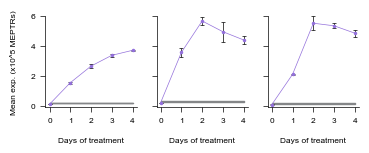

In [68]:
normoxia_gray = [(i/255) for i in [132, 134, 136]]
# create figure 2D plot
fig, axs = plt.subplots(1, 3, figsize=(3.79, 1.7), sharey=True)
axs = axs.ravel()
(_, caps1, _) = axs[0].errorbar(days, meptrs_hypoxia_simple_scaled, std_err_hypoxia_simple_scaled, color="mediumpurple", linestyle="-", marker="o", markersize="1.5", ecolor="k", capsize=1.5, elinewidth=0.5)
axs[0].fill_between(
    days, meptrs_normoxia_simple_scaled-std_err_normoxia_simple_scaled, 
    meptrs_normoxia_simple_scaled+std_err_normoxia_simple_scaled, color=normoxia_gray)
axs[0].set_xlabel("Days of treatment")
axs[0].set_xticks([0, 1, 2, 3, 4])
axs[0].set_ylabel("Mean exp. (x10^5 MEPTRs)")
axs[0].set_ylim(top=6)
print(axs[0].get_ylim())
axs[0].set_box_aspect(1)
(_, caps2, _) = axs[1].errorbar(days, meptrs_hypoxia_h1a_fb_scaled, std_err_hypoxia_h1a_fb_scaled, color="mediumpurple", linestyle="-", marker="o", markersize="1.5", ecolor="k", capsize=1.5, elinewidth=0.5)
axs[1].fill_between(
    days, meptrs_normoxia_h1a_fb_scaled-std_err_normoxia_h1a_fb_scaled, 
    meptrs_normoxia_h1a_fb_scaled+std_err_normoxia_h1a_fb_scaled, color=normoxia_gray)
axs[1].set_xlabel("Days of treatment")
axs[1].set_xticks([0, 1, 2, 3, 4])
axs[1].set_box_aspect(1)
(_, caps3, _) = axs[2].errorbar(days, meptrs_hypoxia_h2a_fb_scaled, std_err_hypoxia_h2a_fb_scaled, color="mediumpurple", linestyle="-", marker="o", markersize="1.5", ecolor="k", capsize=1.5, elinewidth=0.5)
axs[2].fill_between(
    days, meptrs_normoxia_h2a_fb_scaled-std_err_normoxia_h2a_fb_scaled, 
    meptrs_normoxia_h2a_fb_scaled+std_err_normoxia_h2a_fb_scaled, color=normoxia_gray)
axs[2].set_xlabel("Days of treatment")
axs[2].set_xticks([0, 1, 2, 3, 4])
axs[2].set_box_aspect(1)

for cap in caps1:
    cap.set_markeredgewidth(0.5)
for cap in caps2:
    cap.set_markeredgewidth(0.5)
for cap in caps3:
    cap.set_markeredgewidth(0.5)

# plt.show()
plt.savefig(path_plots+"figure_5e_test.svg")

### Figure 5F Statistical tests

In [12]:
df = pd.read_csv(path_exp_data+"Exp11.csv")
df_hypoxic = df[df["day"] != "normoxic"].copy()
print(df_hypoxic)

     condition day  subject        meptrs
0   simple_hbs   0        0   13400.83201
1   simple_hbs   0        1   12808.35547
2   simple_hbs   0        2   13252.71288
3   simple_hbs   1        0   39057.16452
4   simple_hbs   1        1   40303.73607
5   simple_hbs   1        2   40615.37896
6   simple_hbs   2        0   29470.39068
7   simple_hbs   2        1   30012.92365
8   simple_hbs   2        2   30012.92365
9   simple_hbs   3        0   33755.19832
10  simple_hbs   3        1   35802.20853
11  simple_hbs   3        2   35802.20853
12  simple_hbs   4        0  126787.35890
13  simple_hbs   4        1   80639.83676
14  simple_hbs   4        2   86771.32571
18  h1a_fb_hbs   0        3   25428.10590
19  h1a_fb_hbs   0        4   25516.97738
20  h1a_fb_hbs   0        5   23324.81416
21  h1a_fb_hbs   1        3   99515.88506
22  h1a_fb_hbs   1        4  101385.74240
23  h1a_fb_hbs   1        5   93906.31305
24  h1a_fb_hbs   2        3   67718.96475
25  h1a_fb_hbs   2        4   6527

In [14]:
# run 2-way repeated measures ANOVA
# anova_rm_table = repeated_measures_anova(path_stats, "figure5f", df_hypoxic, "meptrs", "day", "condition")
# print(anova_rm_table)

# run tukey's hsd
# tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure5f", "meptrs", df_hypoxic, ["condition", "day"], ["condition","day"]) 
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

# run t-tests for each day vs. normoxia for simple, h1a fb, h2a fb
# format df for t-test code
# df["condition"] = df["condition"] + "_" + df["day"].astype(str)
# print(df)
# comparisons = [
#     ["simple_hbs_0", "simple_hbs_normoxic"],
#     ["simple_hbs_1", "simple_hbs_normoxic"],
#     ["simple_hbs_2", "simple_hbs_normoxic"],
#     ["simple_hbs_3", "simple_hbs_normoxic"],
#     ["simple_hbs_4", "simple_hbs_normoxic"],
#     ["h1a_fb_hbs_0", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_1", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_2", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_3", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_4", "h1a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_0", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_1", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_2", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_3", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_4", "h2a_fb_hbs_normoxic"],
# ]
# t_test_df = run_corrected_t_tests(path_stats, "figure5f", "meptrs", df, comparisons)
# print(t_test_df)

### Figure 5F plots

In [84]:
df_data_plot = pd.read_csv(path_exp_data+"plot_figure5F.csv")
# print(df_data_plot)
df_hypoxia_data = df_data_plot[df_data_plot["day"] != "baseline"].copy()
df_normoxia_data = df_data_plot[df_data_plot["day"] == "baseline"].copy()
days = [0, 1, 2, 3, 4]

In [85]:
# simple HBS data
meptrs_hypoxia_simple = df_hypoxia_data[df_hypoxia_data["condition"] == "simple_hbs"]["meptrs"].to_list()
meptrs_hypoxia_simple_scaled = [i/1E5 for i in meptrs_hypoxia_simple]
std_err_hypoxia_simple = df_hypoxia_data[df_hypoxia_data["condition"] == "simple_hbs"]["std_err"].to_list()
std_err_hypoxia_simple_scaled = [i/1E5 for i in std_err_hypoxia_simple]
meptrs_normoxia_simple = df_normoxia_data[df_normoxia_data["condition"] == "simple_hbs"]["meptrs"].to_list()[0]
meptrs_normoxia_simple_scaled = meptrs_normoxia_simple/1E5
std_err_normoxia_simple = df_normoxia_data[df_normoxia_data["condition"] == "simple_hbs"]["std_err"].to_list()[0]
std_err_normoxia_simple_scaled = std_err_normoxia_simple/1E5

In [86]:
# h1a fb HBS data
meptrs_hypoxia_h1a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h1a_fb_hbs"]["meptrs"].to_list()
meptrs_hypoxia_h1a_fb_scaled = [i/1E5 for i in meptrs_hypoxia_h1a_fb]
std_err_hypoxia_h1a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h1a_fb_hbs"]["std_err"].to_list()
std_err_hypoxia_h1a_fb_scaled = [i/1E5 for i in std_err_hypoxia_h1a_fb]
meptrs_normoxia_h1a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h1a_fb_hbs"]["meptrs"].to_list()[0]
meptrs_normoxia_h1a_fb_scaled = meptrs_normoxia_h1a_fb/1E5
std_err_normoxia_h1a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h1a_fb_hbs"]["std_err"].to_list()[0]
std_err_normoxia_h1a_fb_scaled = std_err_normoxia_h1a_fb/1E5

In [87]:
# h2a fb HBS data
meptrs_hypoxia_h2a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h2a_fb_hbs"]["meptrs"].to_list()
meptrs_hypoxia_h2a_fb_scaled = [i/1E5 for i in meptrs_hypoxia_h2a_fb]
std_err_hypoxia_h2a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h2a_fb_hbs"]["std_err"].to_list()
std_err_hypoxia_h2a_fb_scaled = [i/1E5 for i in std_err_hypoxia_h2a_fb]
meptrs_normoxia_h2a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h2a_fb_hbs"]["meptrs"].to_list()[0]
meptrs_normoxia_h2a_fb_scaled = meptrs_normoxia_h2a_fb/1E5
std_err_normoxia_h2a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h2a_fb_hbs"]["std_err"].to_list()[0]
std_err_normoxia_h2a_fb_scaled = std_err_normoxia_h2a_fb/1E5

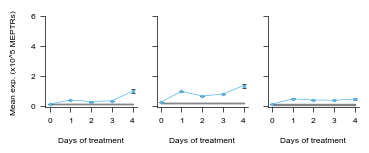

In [88]:
blue_ = [(i/255) for i in [86, 180, 233]]
normoxia_gray = [(i/255) for i in [132, 134, 136]]

fig, axs = plt.subplots(1, 3, figsize=(3.79, 1.7), sharey=True)
axs = axs.ravel()
(_, caps1, _) = axs[0].errorbar(days, meptrs_hypoxia_simple_scaled, std_err_hypoxia_simple_scaled, color=blue_, linestyle="-", marker="o", markersize="1.5", ecolor="k", capsize=1.5, elinewidth=0.5)
axs[0].fill_between(
    days, meptrs_normoxia_simple_scaled-std_err_normoxia_simple_scaled, 
    meptrs_normoxia_simple_scaled+std_err_normoxia_simple_scaled, color=normoxia_gray)
axs[0].set_xlabel("Days of treatment")
axs[0].set_xticks([0, 1, 2, 3, 4])
axs[0].set_ylabel("Mean exp. (x10^5 MEPTRs)")
axs[0].set_ylim(bottom=-0.06457172588620001, top=6)
axs[0].set_box_aspect(1)
(_, caps2, _) = axs[1].errorbar(days, meptrs_hypoxia_h1a_fb_scaled, std_err_hypoxia_h1a_fb_scaled, color=blue_, linestyle="-", marker="o", markersize="1.5", ecolor="k", capsize=1.5, elinewidth=0.5)
axs[1].fill_between(
    days, meptrs_normoxia_h1a_fb_scaled-std_err_normoxia_h1a_fb_scaled, 
    meptrs_normoxia_h1a_fb_scaled+std_err_normoxia_h1a_fb_scaled, color=normoxia_gray)
axs[1].set_xlabel("Days of treatment")
axs[1].set_xticks([0, 1, 2, 3, 4])
axs[1].set_box_aspect(1)
(_, caps3, _) = axs[2].errorbar(days, meptrs_hypoxia_h2a_fb_scaled, std_err_hypoxia_h2a_fb_scaled, color=blue_, linestyle="-", marker="o", markersize="1.5", ecolor="k", capsize=1.5, elinewidth=0.5)
axs[2].fill_between(
    days, meptrs_normoxia_h2a_fb_scaled-std_err_normoxia_h2a_fb_scaled, 
    meptrs_normoxia_h2a_fb_scaled+std_err_normoxia_h2a_fb_scaled, color=normoxia_gray)
axs[2].set_xlabel("Days of treatment")
axs[2].set_xticks([0, 1, 2, 3, 4])
axs[2].set_box_aspect(1)

for cap in caps1:
    cap.set_markeredgewidth(0.5)
for cap in caps2:
    cap.set_markeredgewidth(0.5)
for cap in caps3:
    cap.set_markeredgewidth(0.5)
# plt.show()
plt.savefig(path_plots+"figure_5f.svg")